In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5.1

In [2]:
# define fit A mat
def designmatpoly(X, wtvector):
    X = X[:,0]
    A_traint = np.ones(X.shape)
    #print (len(wtvector), np.shape(A_traint))    
    
    for i in range(len(wtvector)-1):
        X_row = X**(i + 1)
        A_traint = np.vstack((A_traint, X_row))         
    A_train = A_traint.T
    #print (np.shape(A_train))
    return A_train

# regularisation gradient descent function
def reg_gradientdescent(w, X, y, l2, rate, n_iterations):
    wtseq = [w]
    for iteration in range(n_iterations):
        #print('iteration is:', iteration)
        gradients =  2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        #print ('gradients',gradients)
        w = w - rate * gradients
    print ('final gradient',gradients)
    return w

# squared residuals
def squared_residual(x_test, y_test, wt):
    residual = 0
    x_test = x_test[:,0]
    
    for i in range(len(x_test)):
        y_predi = 0
        x_testi = x_test[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_testi, wti)
        residual += (y_test[i] - y_predi)**2   
    #print('residual is:************ ', residual)
    return residual

# predicted value
def predict(x, wt):    
    y_pred = []
    
    for i in range(len(x)):
        y_predi = 0
        x_i = x[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_i, wti)
#             print(wt[wti]*np.power(x_i, wti))
#             print('---------------------------------')
#         print('*************')
        y_pred.append(y_predi)
#   print('y_pred shape',np.shape(y_pred))
    return y_pred

final gradient [ 7.72428281e-04  3.11741623e-04 -7.70986523e-04  2.48855584e-04
 -2.21458591e-05]
init wt  [1. 1. 1. 1. 1.]
final weight  [ 0.14293039  0.16885406  0.1343031  -0.10502954  0.01258108]
residual: 6.097312266350647  degree: 5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
final gradient [ 0.62145286  0.41913678  0.06025966 -0.31338489  0.09671599 -0.00808752]
init wt  [1. 1. 1. 1. 1. 1.]
final weight  [ 3.50845766e-01  2.83002949e-01  1.07319133e-01 -1.25547153e-01
  1.73323288e-02 -2.04372491e-04]
residual: 2.024545340699387  degree: 6
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
final gradient [ 0.64280761  0.55229309  0.39866464  0.09498492 -0.28486216  0.08076793
 -0.00636986]
init wt  [1. 1. 1. 1. 1. 1. 1.]
final weight  [ 0.46037204  0.38845463  0.21827648 -0.0044436  -0.11742505  0.03341382
 -0.00251822]
residual: 1.8420465450751973  degree: 7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

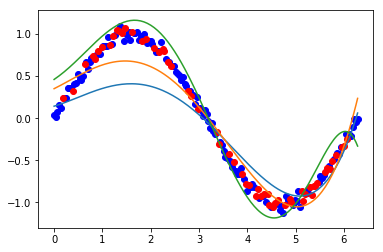

In [87]:
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

points = 180
X=np.linspace(0, 2*np.pi,points)
y= f(X)+np.random.normal(0,0.05,points)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
#y_train = np.expand_dims(y_train, axis=1)
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

for i in range(3):
    degree = i + 5
    w0 = np.ones(degree)  # polynomial degree
    A_train = designmatpoly(X_train, w0)
    
    if degree == 5:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 1, rate = 0.0000015, n_iterations = 2000000) # take lamda = 1 here
    elif degree == 6:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 1, rate = 0.00000001, n_iterations = 40000000) # take lamda = 1 here
    elif degree == 7:
        wtfin = reg_gradientdescent(w0, A_train, y_train, 0.5, rate = 0.000000002, n_iterations = 200000000) # take lamda = 1 here
    else:
        pass
    print('init wt ',w0)
    print('final weight ',wtfin)
    resid = squared_residual(X_test, y_test, wtfin)
    ypred = predict(X, wtfin)
    plt.plot(X, ypred)
    title = 'residual: ' + str(resid) + '  degree: ' + str(degree)
    print(title)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

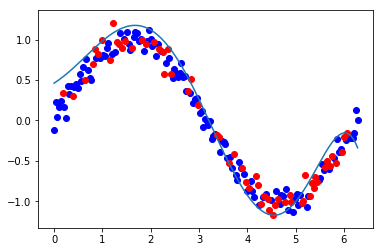

In [85]:
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')
ypred = predict(X, wtfin)
plt.plot(X, ypred)

[ 0.11808554  0.19689184  0.31727733 -0.19938172  0.02653888 -0.00056433]
[ 0.46099906  0.39040219  0.2214649  -0.00202124 -0.11955822  0.03388069
 -0.00255063]


### 5.2 

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf.get_n_splits(X)
wtseq = []
residseq = []
print(kf)  
w0 = np.ones(6)  # polynomial degree

for train_index, test_index in kf.split(X):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    A_train = designmatpoly(X_train, w0)
    wtfin = reg_gradientdescent(w0, A_train, y_train, 0.5, rate = 0.00000001, n_iterations = 40000000) # take lamda = 1 here
    wtseq.append(wtfin)
    resid = squared_residual(X_train, y_train, wtfin)
    print('residual is: ', resid)
    residseq.append(resid)
    
plt.scatter(X, y, c='b')


wtseq = np.asarray(wtseq)
resid_min = np.min(residseq)
place = np.where(resid_min == np.min(residseq))
wtbest = wtseq[place]
print('wtbest is: ')
ypred = predict(X, wtbest.T)
# print('y predict is: ', ypred)
plt.plot(X, ypred)
print('best wt matix is: ',wtbest)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


(180,)